In [46]:
from langchain_experimental.agents.agent_toolkits.pandas.base import create_pandas_dataframe_agent
from langchain_openai import ChatOpenAI
from dotenv import load_dotenv
import matplotlib.pyplot as plt
import pandas as pd
import os

load_dotenv()

import sys
sys.path.append("/Users/quynguyen/Projects/dallm")

from src.models.llms import load_llm

In [47]:
MODEL_NAME = "gpt-3.5-turbo"
llm = load_llm(MODEL_NAME)

In [48]:
# llm.invoke("Hello who you are?")

AIMessage(content='Hello! I am an AI digital assistant designed to help answer questions and provide information. How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 24, 'prompt_tokens': 12, 'total_tokens': 36, 'completion_tokens_details': {'audio_tokens': None, 'reasoning_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': None, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run-46c026be-f156-44b8-8434-5766e44f8bc4-0', usage_metadata={'input_tokens': 12, 'output_tokens': 24, 'total_tokens': 36, 'input_token_details': {'cache_read': 0}, 'output_token_details': {'reasoning': 0}})

In [51]:
df = pd.read_csv('../data/raw/sales-data-sample.csv')
da_agent = create_pandas_dataframe_agent(
    llm=llm,
    df=df,
    agent_type="tool-calling",
    allow_dangerous_code=True,
    verbose=True,
    return_intermediate_steps=True
)



> Entering new AgentExecutor chain...

Invoking: `python_repl_ast` with `{'query': "import matplotlib.pyplot as plt\nimport seaborn as sns\n\nplt.figure(figsize=(12, 6))\nsns.barplot(x='ShipStatus', y='Sales', data=df)\nplt.title('Sales by Ship Status')\nplt.xlabel('Ship Status')\nplt.ylabel('Sales')\nplt.xticks(rotation=45)\nplt.show()"}`




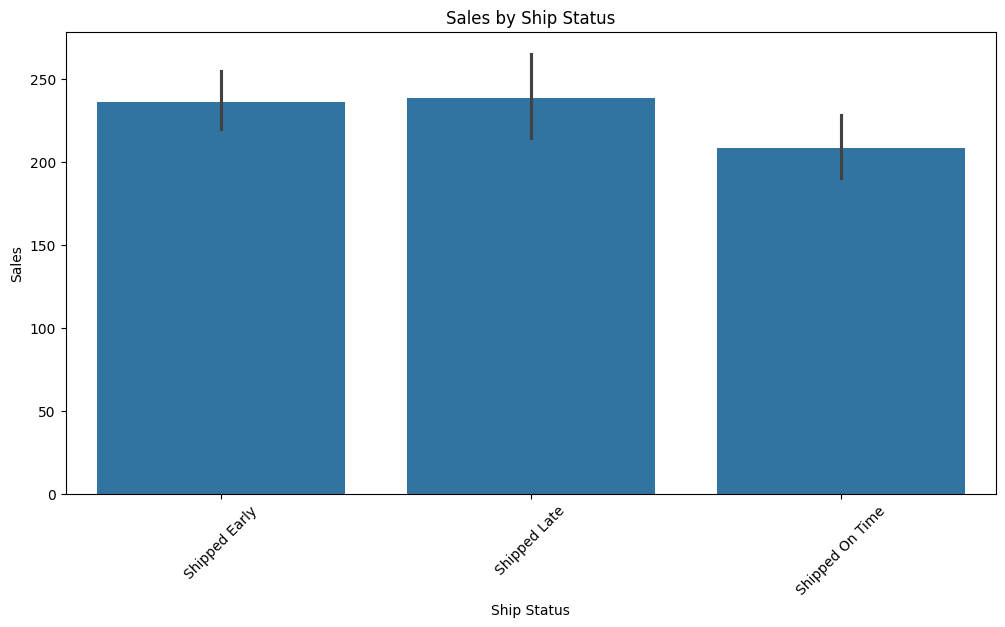

Here is a bar plot showing the sales by ship status. The x-axis represents the ship status, and the y-axis represents the sales.

> Finished chain.


In [69]:
query = 'plot sales by ship status'
response = da_agent.invoke(query)


In [70]:
print(response['intermediate_steps'][0][0].tool_input['query'])

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(x='ShipStatus', y='Sales', data=df)
plt.title('Sales by Ship Status')
plt.xlabel('Ship Status')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()


In [71]:
response['output']

'Here is a bar plot showing the sales by ship status. The x-axis represents the ship status, and the y-axis represents the sales.'